In [1]:
import pandas as pd 

df = pd.read_csv('df_normalized.csv')
df.head()

,Age,Gender,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.244898,1.0,0.428571,0.614458,0.0,0.788732,0.0,0.250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.428571,0.0,0.648352,0.286145,0.0,0.676056,0.0,0.375,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.183673,1.0,0.318681,0.596386,0.0,0.267606,0.0,0.250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.408163,0.0,0.406593,0.388554,0.0,0.338028,1.0,0.375,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,1.0,0.538462,0.331325,0.0,0.436620,0.0,0.250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [2]:
''' 
   q1) Analyze the performance of naïve Bayes with respect to accuracy, recall, precision, 
   FPR, and ROC metrics obtained for heart dataset.
'''
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [3]:
from sklearn.naive_bayes import GaussianNB 

classifer = GaussianNB() 
classifer.fit(X_train, y_train)

GaussianNB()

The accuracy is 86.93%
[[74  9]
 [14 79]]
              precision    recall  f1-score   support

     class 0       0.84      0.89      0.87        83
     class 1       0.90      0.85      0.87        93

    accuracy                           0.87       176
   macro avg       0.87      0.87      0.87       176
weighted avg       0.87      0.87      0.87       176



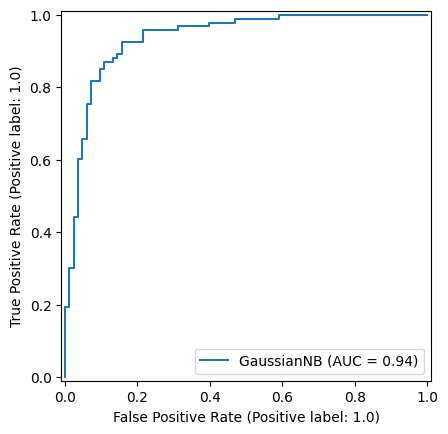

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Predict the class labels
Y_pred = classifer.predict(X_test)


print(f"The accuracy is {accuracy_score(y_test, Y_pred) * 100:.2f}%")


print(confusion_matrix(y_test, Y_pred))


target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_pred, target_names=target_names))

# Compute ROC curve
y_prob = classifer.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

# Plot ROC Curve
RocCurveDisplay.from_estimator(classifer, X_test, y_test)
plt.show()


In [5]:
''' 
 q2) Test the naïve Bayes algorithm with prior probabilities (0.25, 0.75), (0.75, 0.25), 
 and (0.5, 0.5) on heart dataset. Study the impact on performance metrics.
'''
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix


priors_list = [(0.25, 0.75), (0.75, 0.25), (0.5, 0.5)] 

for priors in priors_list:
    # Initialize and train Naïve Bayes classifier with priors
    model = GaussianNB(priors=priors)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
    confusion = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\n===== Naïve Bayes with priors {priors} =====")
    print(f"Accuracy: {accuracy:.4f}, ROC AUC Score: {roc_auc:.4f}, Confusion Matrix: {confusion}")


===== Naïve Bayes with priors (0.25, 0.75) =====
Accuracy: 0.8750, ROC AUC Score: 0.9369, Confusion Matrix: [[72 11]
 [11 82]]

===== Naïve Bayes with priors (0.75, 0.25) =====
Accuracy: 0.8636, ROC AUC Score: 0.9369, Confusion Matrix: [[76  7]
 [17 76]]

===== Naïve Bayes with priors (0.5, 0.5) =====
Accuracy: 0.8693, ROC AUC Score: 0.9369, Confusion Matrix: [[75  8]
 [15 78]]


In [6]:
''' 
 q3) Compare the Guassian implementation of naïve Bayes algorithm with Bernoulli 
 and Multinomial on heart dataset. Study the impact on performance metrics.
'''

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

models = {
    "BernoulliNB": BernoulliNB(),
    "MultinomialNB": MultinomialNB()
}


for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
    confusion = confusion_matrix(y_test, y_pred)

    print(f"\n===== {name} Results =====")
    print(f"Accuracy: {accuracy:.4f}, ROC AUC Score: {roc_auc:.4f}, Confusion Matrix: {confusion}")


===== BernoulliNB Results =====
Accuracy: 0.8580, ROC AUC Score: 0.9408, Confusion Matrix: [[73 10]
 [15 78]]

===== MultinomialNB Results =====
Accuracy: 0.8409, ROC AUC Score: 0.9451, Confusion Matrix: [[70 13]
 [15 78]]


In [7]:
## same model on spambase
df_spam = pd.read_csv('df_spam.csv')
df_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham
0,0.0,1.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000726,0.000400,0.000505,1.0
1,0.0,0.0,0.196078,0.0,0.050,0.0,0.0,0.000000,0.0,0.027503,...,0.0,0.036608,0.0,0.027465,0.000000,0.0,0.000908,0.001802,0.010795,0.0
2,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.116112,0.0,0.023652,...,0.0,0.012715,0.0,0.009545,0.010328,0.0,0.000433,0.000701,0.004040,0.0
3,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.013671,0.000000,0.0,0.001634,0.000601,0.001705,1.0
4,0.0,0.0,0.000000,0.0,0.117,0.0,0.0,0.000000,0.0,0.064356,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000500,0.000901,0.002778,1.0


In [9]:
X = df_spam.drop('ham', axis=1)
y = df_spam['ham']

In [10]:
## train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The accuracy is 79.35%
[[275  13]
 [139 309]]
              precision    recall  f1-score   support

     class 0       0.66      0.95      0.78       288
     class 1       0.96      0.69      0.80       448

    accuracy                           0.79       736
   macro avg       0.81      0.82      0.79       736
weighted avg       0.84      0.79      0.80       736



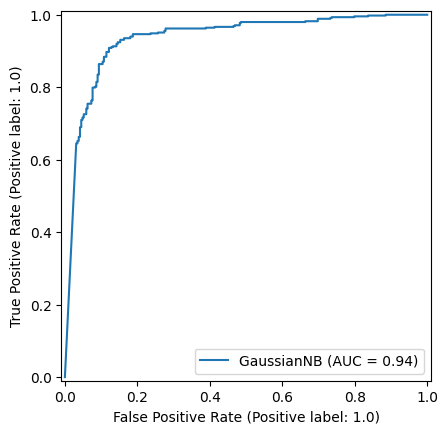

In [11]:
classifer.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Predict the class labels
Y_pred = classifer.predict(X_test)


print(f"The accuracy is {accuracy_score(y_test, Y_pred) * 100:.2f}%")


print(confusion_matrix(y_test, Y_pred))


target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_pred, target_names=target_names))

# Compute ROC curve
y_prob = classifer.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

# Plot ROC Curve
RocCurveDisplay.from_estimator(classifer, X_test, y_test)
plt.show()
